## What YouTube Videos Go Viral? ##

In this project, we will look at a publicly availabe dataset 'Trending YouTube Video Statistics' by Mitchell J. (https://www.kaggle.com/datasets/datasnaek/youtube-new) to try to predict which YouTube videos will go viral. This dataset looks at many different trending Youtube videos across several countries and gives various data about them, such as view count, likes etc. We will be defining whether or not a video goes viral on whether or not it exceeds one million views. A common belief among people that use YouTube is that videos that receive more likes will get viewed more due to YouTube's recommendation algorithm, thus making the videos go viral. We will also see if this holds up. 

Also note, we will only be looking at the US videos portion of the dataset.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [77]:
data = pd.read_csv("USvideos.csv")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In the column headers, we see the various columns represented in the dataset along with some of their values. It is apparent that video_id, channel_title, title, tags, and description have to do with abstract details of the video, and while they may have some correlation to the virality to the video, we want our model to be based on more concrete, numeric aspects of videos. Also, our data would have to have a very high dimensionality if these were included. So we will drop these columns. Also, the trending_date and publish_time have to do with when the video was made and when it was trending. We want our model to be based on numeric data of each video, rather than which date they were made, so we will drop these columns. Lastly, the thumbnail_link column only provides a link to each video's thumbnail, so this will not be influencial on our prediction, and we will drop the column. 

In [78]:
data.drop(['video_id', 'channel_title', 'trending_date', 'title', 'publish_time', 'tags', 'thumbnail_link', 'description'],axis=1,inplace=True)
data.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,False,False,False
1,24,2418783,97185,6146,12703,False,False,False
2,23,3191434,146033,5339,8181,False,False,False
3,24,343168,10172,666,2146,False,False,False
4,24,2095731,132235,1989,17518,False,False,False


Next, we would like to make a column that represents whether the video went viral or not. As previously mentioned, we are defining virality based on whether or not the video surpasses one million views. We will also drop the views column to reduce dimensionality, as this will be exactly correlated to whether or not the video surpasses a million views. We will also check for NA values in this data. 

In [79]:
data['over_1mil_views'] = np.uint8(data.views>1000000)
data1 = data.drop(['views'], axis = 1)
data1.head()

,category_id,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,over_1mil_views
0,22,57527,2966,15954,False,False,False,0
1,24,97185,6146,12703,False,False,False,1
2,23,146033,5339,8181,False,False,False,1
3,24,10172,666,2146,False,False,False,0
4,24,132235,1989,17518,False,False,False,1


In [80]:
data1.isna().sum()

category_id               0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
over_1mil_views           0
dtype: int64

As we can see, there are no NA values in this data. Now, we would like to see some correlations between our variables. 

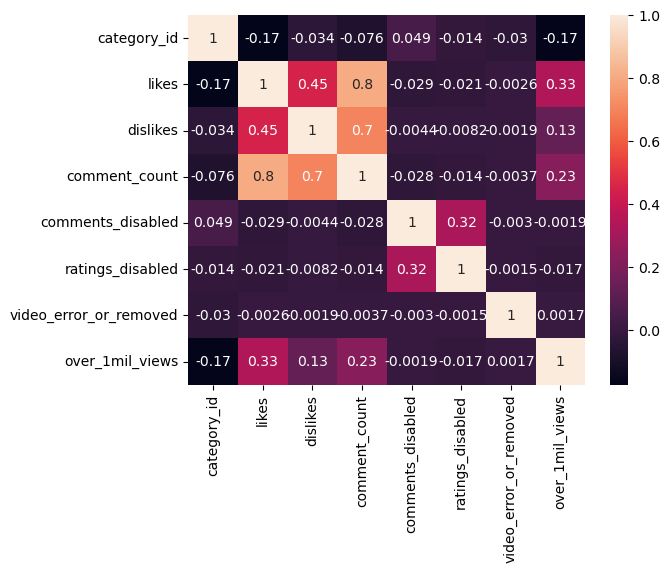

In [81]:
import seaborn as sn

dataplot = sn.heatmap(data1.corr(),annot=True)
plt.show()

We see that comment_count, likes, and dislikes all have a strong correlation. This is likely due to the fact that videos that recieve more views will have more people on the video to like, dislike, or comment. So videos with a high amount of one of these, likely means the video got a high amount of views, and thus a high amount of the other two variables. This is also supported by the fact that whether a video surpasses 1 million views is positively correlated to likes, dislikes, and comment amount. We will look at this correlation later in this project. 

There also is a negative correlation with a video's category and its virality. We will also look at this further.

For now, let's see what ratio of trending videos actually surpass the one million view mark.

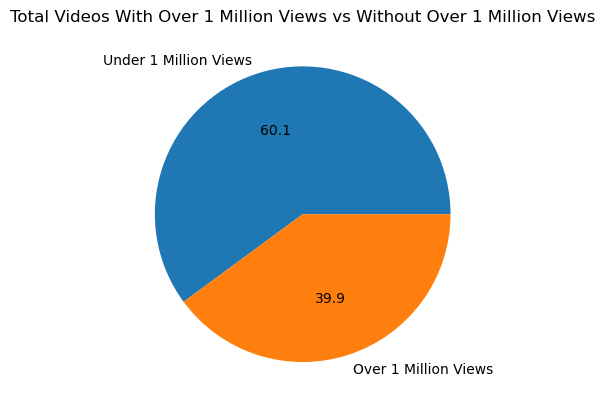

In [82]:

plt.pie([len(data1.over_1mil_views[data1.over_1mil_views==0]),len(data1.over_1mil_views[data1.over_1mil_views==1])], labels=['Under 1 Million Views','Over 1 Million Views'], autopct='%.1f')
plt.title('Total Videos With Over 1 Million Views vs Without Over 1 Million Views')
plt.show()


Here we see that there are more trending videos that recieve less than 1 million views in the data. However, each catagory is substantially represented in the data. 

Next, let's look at that correlation we saw between category of videos and their virality. 

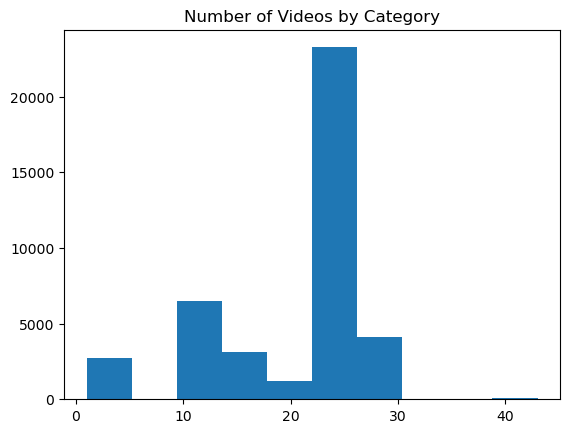

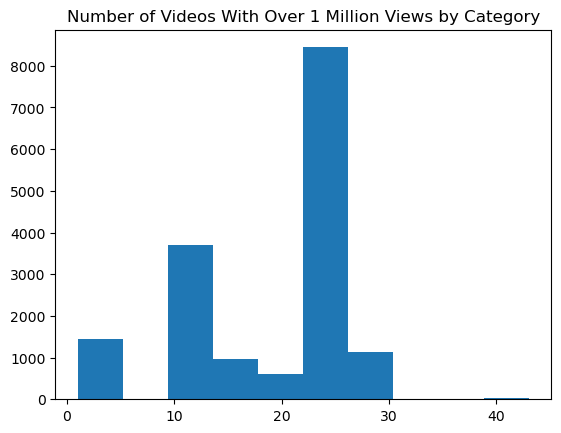

In [83]:
plt.figure(0)
plt.hist(data.category_id)
plt.title('Number of Videos by Category')
plt.show()

plt.figure(1)
temp = data[data.over_1mil_views==1]
plt.hist(temp.category_id)
plt.title('Number of Videos With Over 1 Million Views by Category')
plt.show()

Here, we see the number of videos for each category, and then the numbers of videos for each category that surpassed a million views. The overall shape of the bar charts remains similar, yet there is a seemingly higher ratio of categories 0 to 15 in the videos that go viral. Because of this, there does seem to be some correlation between the category of a video and its virality. 

Next, let's look at how likes and views are related. 

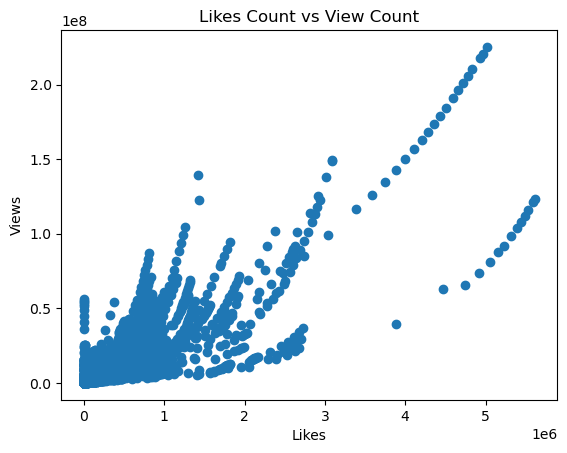

In [84]:

LVcol = ['views','likes']
temp1 = data[LVcol]

plt.scatter(temp1['likes'], temp1['views'])
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Likes Count vs View Count')
plt.show()



In [85]:
#plotting correlations between likes and comments based on heatmap
km = data[LVcol].values
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(km)

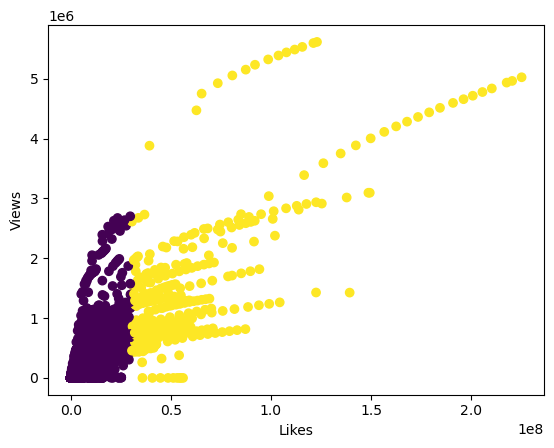

In [86]:
plt.scatter(km[:, 0], km[:, 1], c=kmeans.labels_, cmap = 'viridis')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

Based on each of these plots it is very clear that likes and views have a strong positive correlation. Because of this, it is clear that the common belief that more likes will mean more views is correct. 

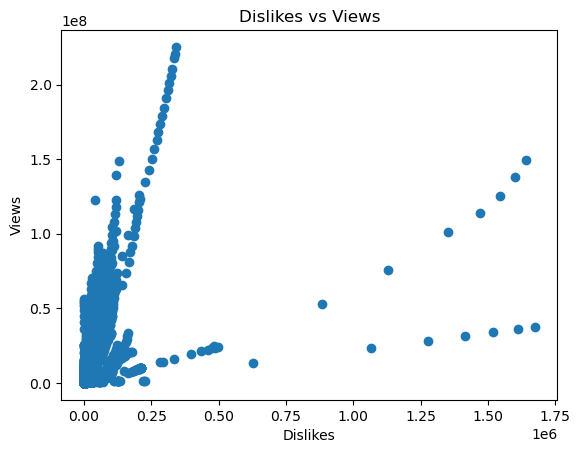

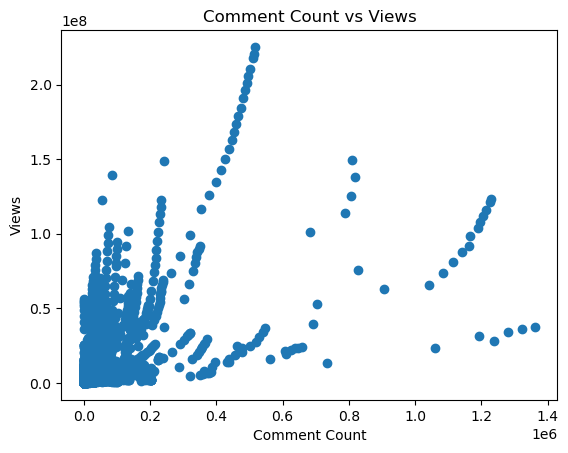

In [87]:
plt.figure(0)
plt.scatter(data.dislikes, data.views)
plt.xlabel('Dislikes')
plt.ylabel('Views')
plt.title('Dislikes vs Views')
plt.show()

plt.figure(1)
plt.scatter(data.comment_count, data.views)
plt.title('Comment Count vs Views')
plt.xlabel('Comment Count')
plt.ylabel('Views')
plt.show()

We clearly see a positive correlation between the amount of comments and views based on these plots. This is likely a result of what we previously mentioned; that higher viewership means more people interacting with the video on likes/dislikes and comments. These three aspects will be very important for the accuracy of our model. 

Now, let's make our model.

In [88]:
labels = np.array(data.over_1mil_views)
data1.drop(['over_1mil_views'], axis = 1, inplace = True)

We separated the `over_1mil_views` columns from our dataset and saved it into `labels`.

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, labels, test_size=0.2) 

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
model.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy of the Logistic Regression Model: {accuracy: .2f}")

Accuracy of the Logistic Regression Model:  0.84


<AxesSubplot:>

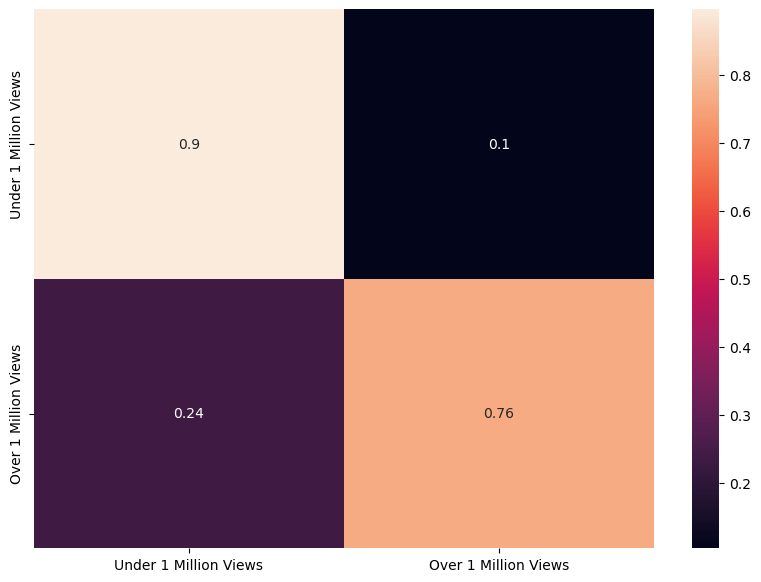

In [92]:

numClasses = 2
labels = ['Under 1 Million Views','Over 1 Million Views']
conf = np.zeros([numClasses,numClasses])
guesses = model.predict(X_test)

for video in range(len(y_test)):
    real = y_test[video]
    guess = guesses[video]
    conf[real,guess] = conf[real,guess] + 1
 
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

So overall, our model is quite accurate. This is likely due to the strong correlation of views to likes/dislikes and number of comments. It is clear that we can indeed make a machine learning model to predict whether or not a video went viral based on the contents of this dataset. One flaw with this model is that it will be very hard for it to predict whether or not a video will go viral before posting, since much of it is based on data that is only known after a video is posted. A model to predict whether or not a video will go viral based only on data known before a videos' posting would be an interesting project to do in the future.